 # ClusterAI - 2020
## TP integrador - Primera parte
### Pre Processing y ML - Obras Públicas
#### Grupo_08 - Septiembre 2020

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_excel('obras_en_trimestres.xlsx')

In [3]:
obras.head()

,Unnamed: 0,etapa,tipo,plazo_trimestres,monto_miles,comuna
0,0,Finalizada,Escuelas,Más de 2 años,67065.700,12
1,1,Finalizada,Espacio Público,Entre 1 y 2 años,9950.017,12
2,2,Finalizada,Espacio Público,Entre 1 y 2 años,36942.632,1
3,3,Finalizada,Espacio Público,Más de 2 años,26938.294,1
4,4,Finalizada,Vivienda,Entre 9 meses y 1 año,6990.315,8


Al igual que hicimos en el análisis por meses, asignaremos como valores NaN a las obras que se encuentren en ejecución o en licitación. De esta forma será más fácil eliminarlas luego. Nos quedamos únicamente con aquellas que hayan sido finalizadas y tengamos el dato del plazo en meses de duración de la obra

In [4]:
obras['etapa'].replace('En ejecución',np.nan,inplace=True)
obras['etapa'].replace('En licitación',np.nan,inplace=True)

In [5]:
obras.dropna(subset=['etapa'],how='any',inplace=True,axis='index')
filas=np.shape(obras)[0]
print(f'Filas:{filas}')

Filas:883


# Objetivo del Proyecto:
Predicción en función de la comuna, el tipo de obra a realizar y el monto del contrato, el tiempo de realización de la misma

## TARGET

In [6]:
target = obras['plazo_trimestres'].unique()
print("\n", obras['plazo_trimestres'].unique())


 ['Más de 2 años' 'Entre 1 y 2 años' 'Entre 9 meses y 1 año'
 'Hasta 3 meses' 'Entre 3 y 6 meses' 'Entre 7 y 9 meses']


In [7]:
target

array(['Más de 2 años', 'Entre 1 y 2 años', 'Entre 9 meses y 1 año',
       'Hasta 3 meses', 'Entre 3 y 6 meses', 'Entre 7 y 9 meses'],
      dtype=object)

In [8]:
# Definimos primero nuestro target, al cual lo guardaremos en una variable y

y_target = obras.iloc[:,3]
y_target

0              Más de 2 años
1           Entre 1 y 2 años
2           Entre 1 y 2 años
3              Más de 2 años
4      Entre 9 meses y 1 año
               ...          
929            Hasta 3 meses
930            Hasta 3 meses
931            Hasta 3 meses
932            Hasta 3 meses
933            Hasta 3 meses
Name: plazo_trimestres, Length: 883, dtype: object

In [9]:
# Al ser una variable categórica la vamos a transformar

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y2 = le.fit_transform(y_target)
obras['Encoded'] = y2


In [10]:
obras.head()

,Unnamed: 0,etapa,tipo,plazo_trimestres,monto_miles,comuna,Encoded
0,0,Finalizada,Escuelas,Más de 2 años,67065.700,12,5
1,1,Finalizada,Espacio Público,Entre 1 y 2 años,9950.017,12,0
2,2,Finalizada,Espacio Público,Entre 1 y 2 años,36942.632,1,0
3,3,Finalizada,Espacio Público,Más de 2 años,26938.294,1,5
4,4,Finalizada,Vivienda,Entre 9 meses y 1 año,6990.315,8,3


In [11]:
target = len(obras['Encoded'].unique()) 
print(f'En total hay {target} plazos posibles de obras."\r\n')
print("\n", obras['Encoded'].unique())

En total hay 6 plazos posibles de obras."


 [5 0 3 4 1 2]


In [13]:
y = obras.iloc[:,6]
y

0      5
1      0
2      0
3      5
4      3
      ..
929    4
930    4
931    4
932    4
933    4
Name: Encoded, Length: 883, dtype: int32

## FEATURES

In [14]:
tipo_obra = pd.get_dummies(obras.tipo)
obras = obras.join(tipo_obra)
obras

,Unnamed: 0,etapa,tipo,plazo_trimestres,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,0,Finalizada,Escuelas,Más de 2 años,67065.700,12,5,0,1,0,0,0,0,0
1,1,Finalizada,Espacio Público,Entre 1 y 2 años,9950.017,12,0,0,0,1,0,0,0,0
2,2,Finalizada,Espacio Público,Entre 1 y 2 años,36942.632,1,0,0,0,1,0,0,0,0
3,3,Finalizada,Espacio Público,Más de 2 años,26938.294,1,5,0,0,1,0,0,0,0
4,4,Finalizada,Vivienda,Entre 9 meses y 1 año,6990.315,8,3,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1111,Finalizada,Espacio Público,Hasta 3 meses,2325.368,8,4,0,0,1,0,0,0,0
930,1112,Finalizada,Espacio Público,Hasta 3 meses,1984.627,8,4,0,0,1,0,0,0,0
931,1114,Finalizada,Espacio Público,Hasta 3 meses,6557.067,9,4,0,0,1,0,0,0,0
932,1115,Finalizada,Espacio Público,Hasta 3 meses,22279.428,15,4,0,0,1,0,0,0,0


In [15]:
x = obras.iloc[:,4:]
x

,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,5,0,1,0,0,0,0,0
1,9950.017,12,0,0,0,1,0,0,0,0
2,36942.632,1,0,0,0,1,0,0,0,0
3,26938.294,1,5,0,0,1,0,0,0,0
4,6990.315,8,3,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
929,2325.368,8,4,0,0,1,0,0,0,0
930,1984.627,8,4,0,0,1,0,0,0,0
931,6557.067,9,4,0,0,1,0,0,0,0
932,22279.428,15,4,0,0,1,0,0,0,0


In [16]:
# Recordamos que Encoded es el dummie generado para nuestro target (sacamos por exclusión)
x = x.drop(['Encoded'],axis=1)
x

,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,0,1,0,0,0,0,0
1,9950.017,12,0,0,1,0,0,0,0
2,36942.632,1,0,0,1,0,0,0,0
3,26938.294,1,0,0,1,0,0,0,0
4,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
929,2325.368,8,0,0,1,0,0,0,0
930,1984.627,8,0,0,1,0,0,0,0
931,6557.067,9,0,0,1,0,0,0,0
932,22279.428,15,0,0,1,0,0,0,0


In [17]:
obras['plazo_trimestres'].value_counts()

Hasta 3 meses            269
Entre 3 y 6 meses        186
Entre 1 y 2 años         179
Entre 7 y 9 meses        104
Entre 9 meses y 1 año     96
Más de 2 años             49
Name: plazo_trimestres, dtype: int64

In [18]:
y.shape

(883,)

In [19]:
x.shape

(883, 9)

## PRE PROCESAMIENTO

In [20]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [21]:
# Separamos el data set en train y test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain.shape))

El tamaño del "X" de entrenamiento es: (618, 9)
Se corresponde con el "Y" de entrenamiento (618,)


In [22]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(xtrain)

In [23]:
xtrain_scaled = scaler.transform (xtrain)
xtest_scaled = scaler.transform (xtest)

In [24]:
xtrain_scaled.shape

(618, 9)

## ML

Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.


### Support Vector Classifier

In [25]:
# Definimos el clasificador

svc = SVC(probability=True, class_weight='balanced')

param_svc={'kernel':('linear','rbf'),
           'C':[0.001, 0.1, 1, 5, 10, 100],
           'gamma':[0.1, 1, 5, 10]}

gs_svc=GridSearchCV(svc, param_grid=param_svc, refit=True,cv=5)
gs_svc.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.001, 0.1, 1, 5, 10, 100],
                         'gamma': [0.1, 1, 5, 10],
                         'kernel': ('linear', 'rbf')})

In [26]:
print ('Los mejores parámetros son: ',  gs_svc.best_params_)
print ('El score obtenido fue: ', gs_svc.best_score_)

Los mejores parámetros son:  {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
El score obtenido fue:  0.4031077891424076


In [27]:
ypred_svc=gs_svc.predict(xtest_scaled)
score_svc=accuracy_score(ytest,ypred_svc)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_svc)))

El accuracy obtenido fue de 0.42 


In [28]:
# Vamos a guardar los resultados y comparar al final

rdos = pd.DataFrame(columns=['Clasificador', 'Accuracy'])

In [29]:
rdos = rdos.append({'Clasificador':'SVC',
                   'Accuracy': score_svc}, ignore_index=True)

In [30]:
print(classification_report(ytest, ypred_svc))

              precision    recall  f1-score   support

           0       0.44      0.38      0.41        52
           1       0.45      0.37      0.41        67
           2       0.18      0.30      0.22        30
           3       0.20      0.17      0.19        29
           4       0.69      0.65      0.67        72
           5       0.30      0.40      0.34        15

    accuracy                           0.42       265
   macro avg       0.38      0.38      0.37       265
weighted avg       0.45      0.42      0.43       265



### KNN Classifier

In [31]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn = GridSearchCV(knn, param_grid=param_knn,refit=True, cv=5)
gs_knn.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [32]:
print ('Los mejores parámetros son: ', gs_knn.best_params_)
print ('El score obtenido fue: ', gs_knn.best_score_)
ypred_knn=gs_knn.predict(xtest_scaled)
score_knn=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn)))

Los mejores parámetros son:  {'n_neighbors': 5}
El score obtenido fue:  0.39169944925255706
El accuracy obtenido fue de 0.42 


In [33]:
rdos = rdos.append({'Clasificador':'KNN',
                    'Accuracy': score_knn}, ignore_index=True)

In [34]:
# Vamos a ver cómo varía el accuracy en función de los distintos K

iteraciones_knn = 50
acc_knn = np.zeros(iteraciones_knn)

In [35]:
for r in range(0,iteraciones_knn):
   
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scaled,ytrain)
    ypred_knn = neigh.predict(xtest_scaled)
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

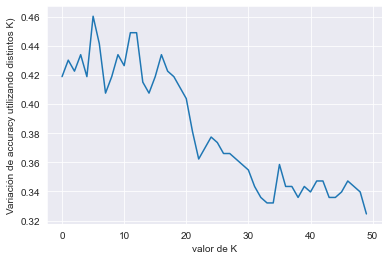

In [37]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
sns.set_style('darkgrid')
plt.show()

In [38]:
# Como vimos del gráfico anterior, a mayor K, el accuracy disminuye. 

rdos

,Clasificador,Accuracy
0,SVC,0.422642
1,KNN,0.418868


### Random Forest Classifier

In [39]:
rfr = RandomForestClassifier()

param_rfr = {'n_estimators':[1,2,5,10,15,20,25,50,75,100]}

gs_rfr = GridSearchCV(rfr, param_grid=param_rfr, cv=5)
gs_rfr.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 15, 20, 25, 50, 75,
                                          100]})

In [40]:
print ('Los mejores parámetros son: ', gs_rfr.best_params_)
print ('El score obtenido fue: ', gs_rfr.best_score_)
ypred_rfr=gs_rfr.predict(xtest_scaled)
score_rfr=accuracy_score(ytest,ypred_rfr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_rfr)))

Los mejores parámetros son:  {'n_estimators': 100}
El score obtenido fue:  0.406215578284815
El accuracy obtenido fue de 0.41 


In [41]:
rdos = rdos.append({'Clasificador':'Random Forest',
                   'Accuracy': score_rfr}, ignore_index=True)

In [42]:
rdos

,Clasificador,Accuracy
0,SVC,0.422642
1,KNN,0.418868
2,Random Forest,0.411321


### Logistic Regression 

In [43]:
lr = LogisticRegression()

param_lr = {'C': [1, 5, 10, 50, 70, 100, 150]}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5)
gs_lr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100, 150]})

In [44]:
print ('Los mejores parámetros son: ', gs_lr.best_params_)
print ('El score obtenido fue: ', gs_lr.best_score_)
ypred_lr=gs_lr.predict(xtest_scaled)
score_lr=accuracy_score(ytest,ypred_lr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_lr)))

Los mejores parámetros son:  {'C': 50}
El score obtenido fue:  0.40778914240755304
El accuracy obtenido fue de 0.46 


In [45]:
rdos = rdos.append({'Clasificador':'LR',
                   'Accuracy': score_lr}, ignore_index=True)

In [46]:
rdos

,Clasificador,Accuracy
0,SVC,0.422642
1,KNN,0.418868
2,Random Forest,0.411321
3,LR,0.456604


### One Vs Rest Classifier (SVM)

In [47]:
# Al ser un problema de clasificación multiclase, probamos con OVO y OVR

ovr = OneVsRestClassifier(SVC())
ovr.fit(xtrain_scaled,ytrain)

OneVsRestClassifier(estimator=SVC())

In [48]:
ypred_ovr = ovr.predict(xtest_scaled)
score_ovr = accuracy_score(ytest,ypred_ovr)

rdos = rdos.append({'Clasificador':'OVR',
                   'Accuracy': score_ovr}, ignore_index=True)

In [49]:
rdos

,Clasificador,Accuracy
0,SVC,0.422642
1,KNN,0.418868
2,Random Forest,0.411321
3,LR,0.456604
4,OVR,0.366038


### One Vs One Classifier (SVM)

In [50]:
ovo = OneVsOneClassifier(SVC())
ovo.fit(xtrain_scaled,ytrain)

OneVsOneClassifier(estimator=SVC())

In [51]:
ypred_ovo = ovo.predict(xtest_scaled)
score_ovo = accuracy_score(ytest,ypred_ovo)
score_ovo

0.3320754716981132

In [52]:
rdos = rdos.append({'Clasificador':'OVO',
                   'Accuracy': score_ovo}, ignore_index=True)

In [53]:
rdos

,Clasificador,Accuracy
0,SVC,0.422642
1,KNN,0.418868
2,Random Forest,0.411321
3,LR,0.456604
4,OVR,0.366038
5,OVO,0.332075


## Resultados / Visualización

In [55]:
from sklearn.metrics import plot_confusion_matrix

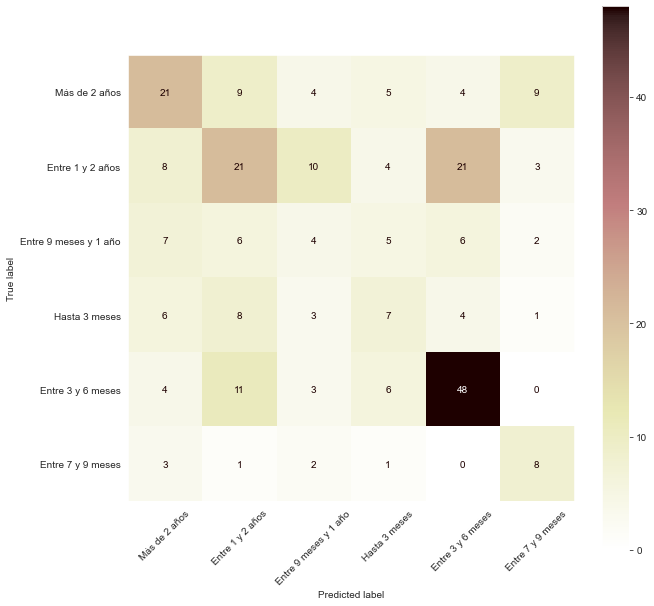

In [84]:
labels = obras['plazo_trimestres'].unique()
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(gs_rfr, xtest_scaled, ytest,
                            display_labels=labels,
                            cmap=plt.cm.pink_r,
                            xticks_rotation=45,
                            ax=ax)
sns.set_style('dark')

In [83]:
print(classification_report(ytest, ypred_rfr))

              precision    recall  f1-score   support

           0       0.43      0.40      0.42        52
           1       0.38      0.31      0.34        67
           2       0.15      0.13      0.14        30
           3       0.25      0.24      0.25        29
           4       0.58      0.67      0.62        72
           5       0.35      0.53      0.42        15

    accuracy                           0.41       265
   macro avg       0.36      0.38      0.36       265
weighted avg       0.40      0.41      0.40       265



## Balanceamos

In [85]:
obras['plazo_trimestres'].value_counts()

Hasta 3 meses            269
Entre 3 y 6 meses        186
Entre 1 y 2 años         179
Entre 7 y 9 meses        104
Entre 9 meses y 1 año     96
Más de 2 años             49
Name: plazo_trimestres, dtype: int64

In [86]:
obras['Encoded'].value_counts()

4    269
1    186
0    179
2    104
3     96
5     49
Name: Encoded, dtype: int64

In [87]:
from sklearn.utils import resample

# Primero separamos las clases

obras1 = obras[obras.Encoded==4]
obras2 = obras[obras.Encoded==1]
obras3 = obras[obras.Encoded==0]
obras4 = obras[obras.Encoded==2]
obras5 = obras[obras.Encoded==3]
obras6 = obras[obras.Encoded==5]

# Generamos samples para que las 4 clases tengan el mismo peso

obras1_upsampled = resample(obras1, replace=True, n_samples=269, random_state=8)
obras2_upsampled = resample(obras2, replace=True, n_samples=269, random_state=8)
obras3_upsampled = resample(obras3, replace=True, n_samples=269, random_state=8)
obras4_upsampled = resample(obras4, replace=True, n_samples=269, random_state=8)
obras5_upsampled = resample(obras5, replace=True, n_samples=269, random_state=8)
obras6_upsampled = resample(obras6, replace=True, n_samples=269, random_state=8)

# Combinamos todas las clases y contamos los valores

obras_upsampled = pd.concat([obras1_upsampled,obras2_upsampled,obras3_upsampled,obras4_upsampled,obras5_upsampled,obras6_upsampled])

obras_upsampled['Encoded'].value_counts()

5    269
4    269
3    269
2    269
1    269
0    269
Name: Encoded, dtype: int64

In [88]:
y = obras_upsampled.iloc[:,3]
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
obras_upsampled['Encoded'] = y

In [89]:
x = obras_upsampled.iloc[:,4:]
x = x.drop(['Encoded'],axis=1)

In [90]:
y.shape

(1614,)

In [91]:
x.shape

(1614, 9)

In [92]:
# Separamos el data set en train y test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain.shape))

El tamaño del "X" de entrenamiento es: (1129, 9)
Se corresponde con el "Y" de entrenamiento (1129,)


In [93]:
scaler = preprocessing.StandardScaler().fit(xtrain)

In [94]:
xtrain_scaled = scaler.transform (xtrain)
xtest_scaled = scaler.transform (xtest)

In [95]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn = GridSearchCV(knn, param_grid=param_knn,refit=True, cv=5)
gs_knn.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [96]:
print ('Los mejores parámetros son: ', gs_knn.best_params_)
print ('El score obtenido fue: ', gs_knn.best_score_)
ypred_knn=gs_knn.predict(xtest_scaled)
score_knn=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn)))

Los mejores parámetros son:  {'n_neighbors': 1}
El score obtenido fue:  0.7653018682399214
El accuracy obtenido fue de 0.87 


In [97]:
rdos = rdos.append({'Clasificador':'KNN - ups',
                    'Accuracy': score_knn}, ignore_index=True)

In [98]:
rdos

,Clasificador,Accuracy
0,SVC,0.422642
1,KNN,0.418868
2,Random Forest,0.411321
3,LR,0.456604
4,OVR,0.366038
5,OVO,0.332075
6,KNN - ups,0.872165


In [99]:
rfr = RandomForestClassifier()

param_rfr = {'n_estimators':[1,2,5,10,15,20,25,50,75,100]}

gs_rfr = GridSearchCV(rfr, param_grid=param_rfr, cv=5)
gs_rfr.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 15, 20, 25, 50, 75,
                                          100]})

In [100]:
print ('Los mejores parámetros son: ', gs_rfr.best_params_)
print ('El score obtenido fue: ', gs_rfr.best_score_)
ypred_rfr=gs_rfr.predict(xtest_scaled)
score_rfr=accuracy_score(ytest,ypred_rfr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_rfr)))

Los mejores parámetros son:  {'n_estimators': 75}
El score obtenido fue:  0.7697463126843658
El accuracy obtenido fue de 0.86 


In [101]:
rdos = rdos.append({'Clasificador':'Random Forest - ups',
                   'Accuracy': score_rfr}, ignore_index=True)

In [102]:
lr = LogisticRegression()

param_lr = {'C': [1, 5, 10, 50, 70, 100, 150]}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5)
gs_lr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100, 150]})

In [103]:
print ('Los mejores parámetros son: ', gs_lr.best_params_)
print ('El score obtenido fue: ', gs_lr.best_score_)
ypred_lr=gs_lr.predict(xtest_scaled)
score_lr=accuracy_score(ytest,ypred_lr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_lr)))

Los mejores parámetros son:  {'C': 150}
El score obtenido fue:  0.3472448377581121
El accuracy obtenido fue de 0.40 


In [104]:
rdos = rdos.append({'Clasificador':'LR - ups',
                   'Accuracy': score_lr}, ignore_index=True)

In [105]:
ovr = OneVsRestClassifier(SVC())
ovr.fit(xtrain_scaled,ytrain)

OneVsRestClassifier(estimator=SVC())

In [106]:
ypred_ovr = ovr.predict(xtest_scaled)
score_ovr = accuracy_score(ytest,ypred_ovr)

rdos = rdos.append({'Clasificador':'OVR - ups',
                   'Accuracy': score_ovr}, ignore_index=True)

In [107]:
ovo = OneVsOneClassifier(SVC())
ovo.fit(xtrain_scaled,ytrain)

OneVsOneClassifier(estimator=SVC())

In [108]:
ypred_ovo = ovo.predict(xtest_scaled)
score_ovo = accuracy_score(ytest,ypred_ovo)
score_ovo

0.3711340206185567

In [109]:
rdos = rdos.append({'Clasificador':'OVO - ups',
                   'Accuracy': score_ovo}, ignore_index=True)

In [110]:
rdos

,Clasificador,Accuracy
0,SVC,0.422642
1,KNN,0.418868
2,Random Forest,0.411321
3,LR,0.456604
4,OVR,0.366038
5,OVO,0.332075
6,KNN - ups,0.872165
7,Random Forest - ups,0.861856
8,LR - ups,0.402062
9,OVR - ups,0.422680


## Resultados / Visualización

In [111]:
from sklearn.metrics import plot_confusion_matrix

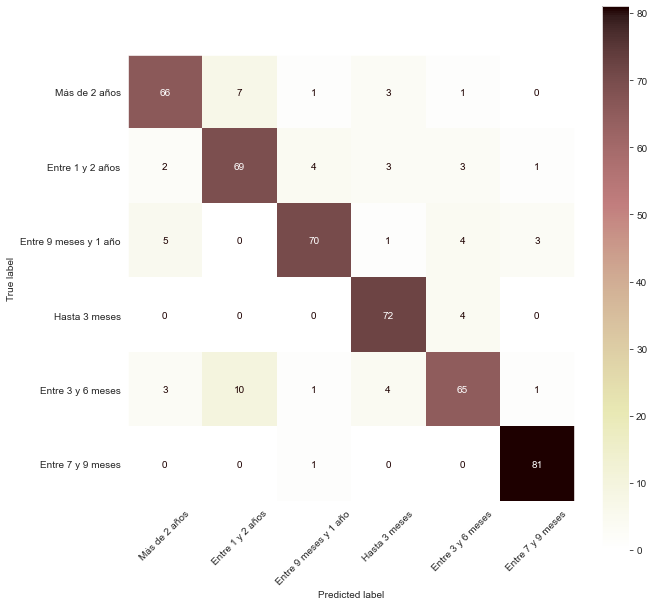

In [112]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(gs_knn, xtest_scaled, ytest,
                            display_labels=labels,
                            cmap=plt.cm.pink_r,
                            xticks_rotation=45,
                            ax=ax)

In [113]:
print(classification_report(ytest, ypred_knn))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        78
           1       0.80      0.84      0.82        82
           2       0.91      0.84      0.88        83
           3       0.87      0.95      0.91        76
           4       0.84      0.77      0.81        84
           5       0.94      0.99      0.96        82

    accuracy                           0.87       485
   macro avg       0.87      0.87      0.87       485
weighted avg       0.87      0.87      0.87       485



## Conclusiones / Observaciones

Definiendo el modelo en períodos más grandes de tiempo, vemos cómo mejora el resultado del clasificador en comparación a realizarlo por meses. Sin embargo, el accuracy continúa siendo bajo, esto probablemente sea porque el set se encuentra desbalanceado. 
En la segunda parte, cuando se realiza el resample para agregar muestras y que todos posean la misma cantidad dentro del dataset podemos observar cómo mejora el accuracy. Esta mejora se ve atada a un mayor costo computacional ya que el tiempo de entrenamiento y testeo resulta mayor (por el mayor número de muestras)